In [10]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
plt.style.use('seaborn-v0_8-whitegrid')

In [12]:
diamonds = sns.load_dataset('diamonds')

In [13]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
print("Dataset Information:")
print(f"Number of rows: {diamonds.shape[0]}")
print(f"Number of columns: {diamonds.shape[1]}")
print("\nColumn Data Types:")
print(diamonds.dtypes)

Dataset Information:
Number of rows: 53940
Number of columns: 10

Column Data Types:
carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object


In [15]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
selected_vars = ['carat', 'price', 'depth']
selected_data = diamonds[selected_vars]

# Create descriptive names for the variables
var_names = {
    'carat': 'Weight',
    'price': 'Price',
    'depth': 'Depth Percentage'
}

In [17]:
def custom_pair_plot(data, var_names, fig_size=(12, 12)):
    """
    Create a custom pair plot for the given data.

    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame containing the variables to plot
    var_names : dict
        Dictionary mapping variable names to descriptive names
    fig_size : tuple, optional
        Figure size (width, height) in inches
    """
    # Get the variable names
    vars_to_plot = list(data.columns)
    n_vars = len(vars_to_plot)

    # Create a figure with a grid of subplots
    fig, axes = plt.subplots(n_vars, n_vars, figsize=fig_size)

    # Define gray shades for scatter plots
    light_gray = '0.3'
    dark_gray = '0.9'

    # Loop through each variable pair
    for i, var_i in enumerate(vars_to_plot):
        for j, var_j in enumerate(vars_to_plot):
            ax = axes[i, j]

            # Diagonal: Histogram with custom binning
            if i == j:
                # Get the data for the current variable
                x = data[var_i]

                # Implement custom binning
                q75, q25 = np.percentile(x, [75, 25])
                iqr = q75 - q25
                bin_width = 2 * iqr / (len(x) ** (1/3))
                n_bins = int(np.ceil((x.max() - x.min()) / bin_width))

                # Create the histogram
                ax.hist(x, bins=n_bins, color='gray', alpha=0.7, edgecolor='black')

                # Add a title with the descriptive variable name
                ax.set_title(var_names[var_i])

                # Remove y-axis labels for cleaner look
                ax.set_yticklabels([])

            # Off-diagonal: Scatter plots
            else:
                # Get the data for the current variable pair
                x = data[var_j]
                y = data[var_i]

                # Choose color based on position relative to diagonal
                color = light_gray if i < j else dark_gray

                # Create the scatter plot
                ax.scatter(x, y, s=5, color=color, alpha=0.6)

                # Add a title with descriptive variable names
                if i == 0:
                    ax.set_title(var_names[var_j])
                if j == 0:
                    ax.set_ylabel(var_names[var_i])

                # Add a more descriptive title inside the plot
                if i != 0 or j != 0:
                    ax.set_title(f"{var_names[var_i]} by {var_names[var_j]}",
                                fontsize=8, pad=2)

    # Add a main title to the figure
    fig.suptitle('Pair Plot of Diamond Characteristics', fontsize=16, y=0.98)

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)

    return fig, axes

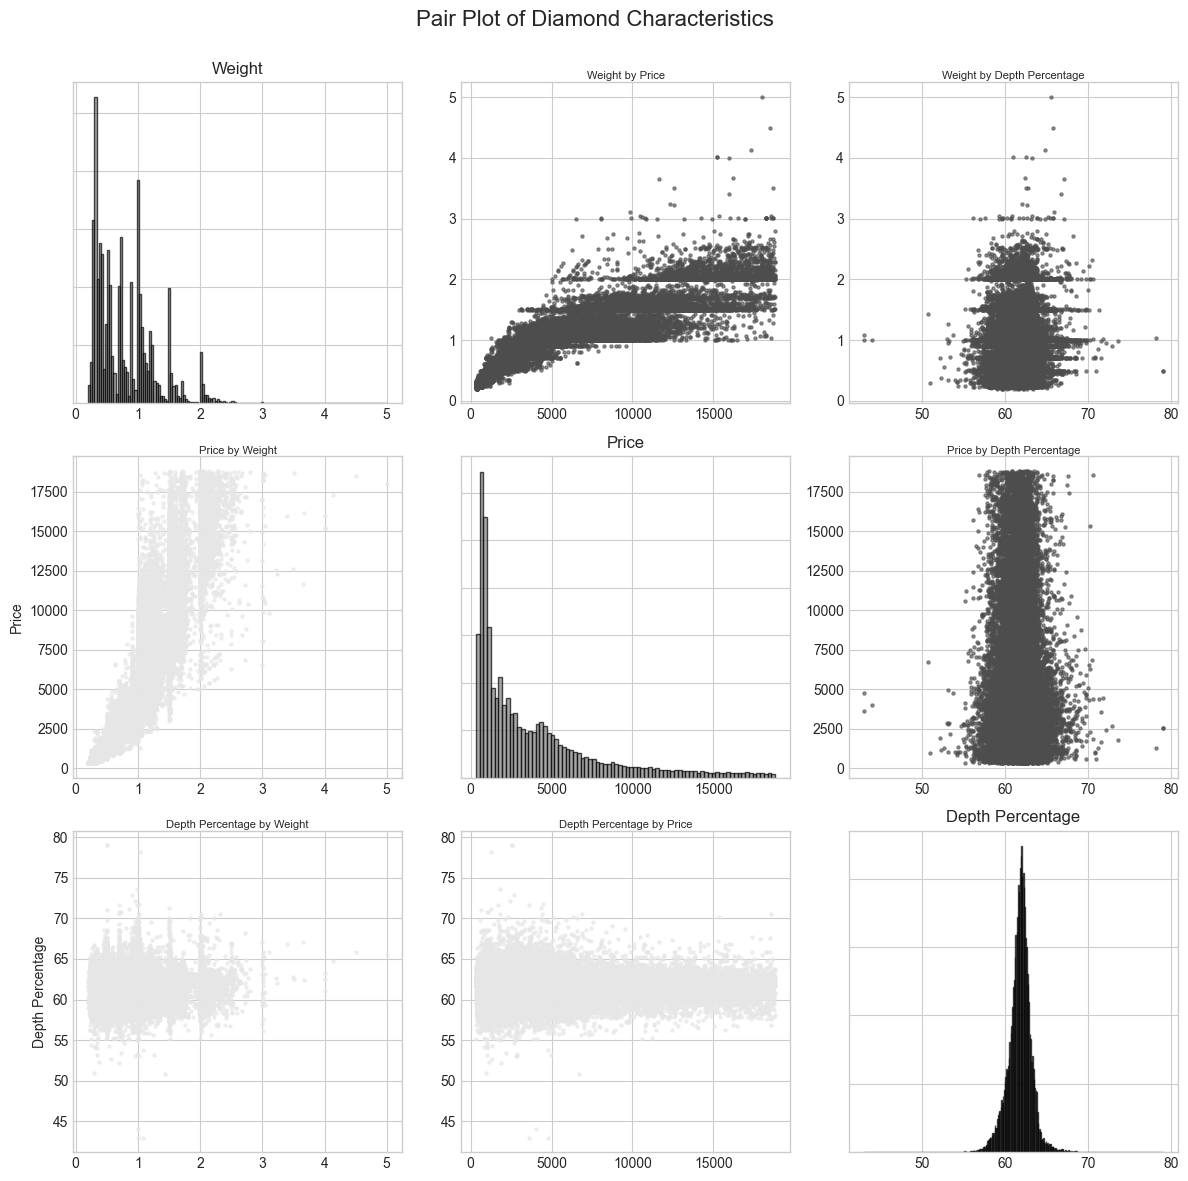

In [18]:
fig, axes = custom_pair_plot(selected_data, var_names)

plt.show()

From the plots above, we can observe several interesting patterns in the diamond dataset. The weight distribution is right-skewed, indicating that smaller diamonds are more common in the market. Price follows a similar;y skewed distribution, with most diamonds falling in the lower price range. Depth percentage shows a more normal distribution centered around 61-62%. There's a strong positive correlation between carat and price, which is expected as larger diamonds typically cost more. The relationship between depth and the other variables is less pronounced, suggesting that depth percentage is not strongly related to either weight or price.